<a href="https://colab.research.google.com/github/willy-wagtail/Notes/blob/master/Linear_classifier_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [34]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
  mean=[0,3],
  cov=[[1,0.5 ], [0.5,1]],
  size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
  mean=[3,0],
  cov=[[1,0.5], [0.5,1]],
  size=num_samples_per_class
)

inputs = np.vstack(
    (negative_samples, positive_samples)
  ).astype(np.float32)

targets = np.vstack(
    (
     np.zeros((num_samples_per_class, 1), dtype="float32"), 
     np.ones((num_samples_per_class, 1), dtype="float32")
     )
    )


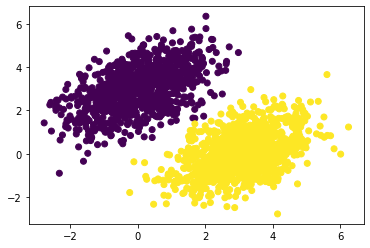

In [35]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [36]:
input_dim = 2
output_dim = 1

W=tf.Variable(
    initial_value=tf.random.uniform(
        shape=(input_dim, output_dim)
      )
    )

b=tf.Variable(
    initial_value=tf.zeros(
        shape=(output_dim,)
      )
    )


In [38]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [39]:
def square_loss(targets, predictions) :
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [40]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)

  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss
